In [1]:
import pandas as pd
import numpy as np

In [ ]:
path = '../../data/gtd.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')
print(df.shape)
print("Original DataFrame size:", len(df))
df = df.loc[(df['iyear'] != 0) & (df['imonth'] != 0) & (df['iday'] != 0)]
df = df[(df["gname"] != 'Unknown')]
df = df[df['weaptype1_txt'] != 'Unknown']
print("Filtered DataFrame size:", len(df))


C:\Users\alexa\AppData\Local\Temp\ipykernel_13076\3106184387.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='ISO-8859-1')


(181691, 135)
Original DataFrame size: 181691
Filtered DataFrame size: 87500


In [3]:
partition4 = df[df['iyear'] > 2010]
partition4['attack_date'] = pd.to_datetime({'year': df['iyear'], 'month': df['imonth'], 'day': df['iday']})
groups = partition4.groupby(['iyear', 'gname']).size().reset_index(name='count')
top5 = groups.groupby('gname')['count'].sum().nlargest(5).index
top5 = top5.delete(1)
top5

C:\Users\alexa\AppData\Local\Temp\ipykernel_16064\1736697931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partition4['attack_date'] = pd.to_datetime({'year': df['iyear'], 'month': df['imonth'], 'day': df['iday']})


Index(['Taliban', 'Al-Shabaab', 'Boko Haram', 'New People's Army (NPA)'], dtype='object', name='gname')

In [4]:
partition4 = partition4[partition4['gname'].isin(top5)]


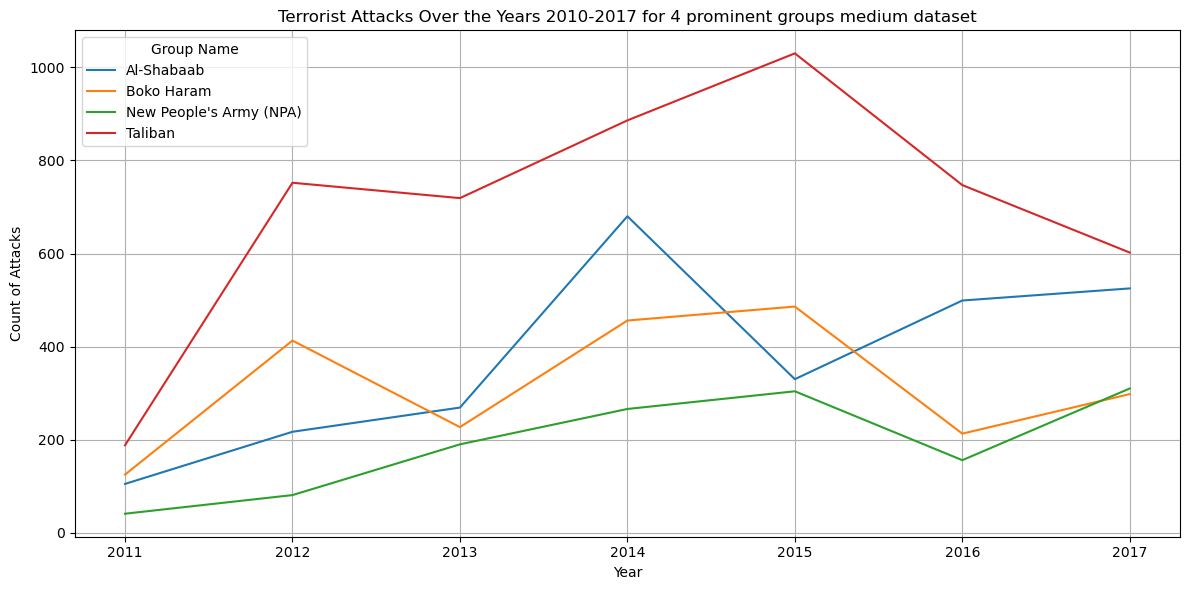

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = partition4.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Terrorist Attacks Over the Years 2010-2017 for 4 prominent groups medium dataset')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [6]:
def counts(dataframe, groups):
    total = 0
    for gname in groups:
        count = len(dataframe[dataframe['gname'] == gname])
        total += count
        print(f'{gname}: {count}')
    return total

# Call the function with the DataFrame and groups
total = counts(partition4, top5)
print('Total before downscaling:', total)


Taliban: 4924
Al-Shabaab: 2625
Boko Haram: 2218
New People's Army (NPA): 1348
Total before downscaling: 11115


In [7]:
partition4.sort_values(by='attack_date')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,attack_date
99705,201101010005,2011,1,1,NaN,0,NaN,147,Nigeria,11,...,"Voice of America, ""Nigerian Muslim Sect Blamed...","Yahoo News, ""Church Burned in Nigeria: Police,...","Daily Trust, ""Gunmen Attack Church in Maidugur...",ISVG,0,0,0,0,NaN,2011-01-01
99718,201101030006,2011,1,3,NaN,0,NaN,147,Nigeria,11,...,"Press TV, ""Policeman Shot Dead in Nigeria,"" ht...","Ibrahim Mshelizza, ""Policeman Shot Dead in Nor...","Voice of America, ""Nigerian Muslim Sect Blamed...",ISVG,0,0,0,0,NaN,2011-01-03
99728,201101040006,2011,1,4,NaN,0,NaN,160,Philippines,5,...,"Janes Intelligence, Unidentified Militants K...","Nancy C. Carvajal, Cops Eye NPA Angle in Vice...","Philippines News Agency, QCPD Eyes Politics i...",ISVG,0,0,0,0,NaN,2011-01-04
99729,201101040007,2011,1,4,NaN,0,NaN,182,Somalia,11,...,"Jane's Intelligence, ""Shabab Militants Maim Yo...","Shabelle Media Network, ""Al-Shabab Cuts Off Le...","Key Media, ""Shabab Cuts off Leg and Hand Teena...",ISVG,0,0,0,0,NaN,2011-01-04
99737,201101040015,2011,1,4,NaN,1,NaN,4,Afghanistan,6,...,"Janes Intelligence, Taliban Militants Kidnap...","BBC Monitoring South Asia, ""Afghan Taliban Att...",NaN,ISVG,0,0,0,0,NaN,2011-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181676,201712310009,2017,12,31,NaN,0,NaN,4,Afghanistan,6,...,"""Commander among 5 ALP members killed in Logar...","""Media Highlights on Afghanistan 1 January 201...",NaN,START Primary Collection,0,0,0,0,NaN,2017-12-31
181683,201712310018,2017,12,31,NaN,0,NaN,4,Afghanistan,6,...,"""Six Members Of One Family Shot Dead In Faryab...","""Highlights: Pakistan Pashto Press 02 January ...",NaN,START Primary Collection,0,0,0,0,NaN,2017-12-31
181653,201712300011,2017,12,31,NaN,0,NaN,37,Cameroon,11,...,"""Female Suicide Bomber Kills One, Wounds 28 In...","""Female suicide bomber kills one, injures 28,""...","""Xinhua: 1st LD: Two Killed In Suspected Boko ...",START Primary Collection,1,1,0,1,NaN,2017-12-31
181675,201712310008,2017,12,31,NaN,0,NaN,182,Somalia,11,...,"""Somalia: Al-Shabab says 5 AU soldiers dead in...","""Somalia: Fifteen Police Officers Complete Tra...","""Two die in Mogadishu bomb attack,"" Xinhua Gen...",START Primary Collection,0,1,1,1,NaN,2017-12-31


In [8]:
import pandas as pd

def downscaling(dataframe, group, downscale_factor):
    # Assuming your test set is called 'test_df'
    eta_ira_df = dataframe[dataframe['gname'].isin([group])]
    non_eta_ira_df = dataframe[~dataframe['gname'].isin([group])]

    # Determine how much to downscale (e.g., keep 50% of the original)
    #downscale_factor = 0.25  # Adjust as needed
    target_size = int(len(eta_ira_df) * downscale_factor)

    # Stratified sampling based on key feature distributions
    sampled_eta_ira_df = eta_ira_df.groupby(['weaptype1_txt', 'attacktype1_txt', 'city'], group_keys=False).apply(
        lambda x: x.sample(frac=downscale_factor, random_state=42) if len(x) > 1 else x
    ).reset_index(drop=True)

    # Combine the reduced ETA/IRA data with the rest of the test set
    downscaled_test_df = pd.concat([non_eta_ira_df, sampled_eta_ira_df], ignore_index=True)

    # Verify new class distribution
    #print(downscaled_test_df['gname'].value_counts(normalize=True))  # Check proportion
    #print(len(downscaled_test_df[downscaled_test_df['gname']==group]))
    #print(counts(downscaled_test_df, top5))
    return downscaled_test_df

downscaled_df = downscaling(partition4, 'Taliban', 0.15)
downscaled_df_2 = downscaling(downscaled_df, 'Boko Haram', 0.55)
downscaled_df_3 = downscaling(downscaled_df_2, 'Al-Shabaab', 0.5)

print(downscaled_df_3['gname'].value_counts(normalize=True))  # Check proportion
#print(len(downscaled_df_3[downscaled_df_3['gname']==group]))
total = counts(downscaled_df_3, top5)
print('Total after downscaling: ', total)

gname
Taliban                    0.319970
Al-Shabaab                 0.240991
Boko Haram                 0.236637
New People's Army (NPA)    0.202402
Name: proportion, dtype: float64
Taliban: 2131
Al-Shabaab: 1605
Boko Haram: 1576
New People's Army (NPA): 1348
Total after downscaling:  6660


In [9]:
dfdownscaled = downscaled_df_3

In [19]:
print(f"Total rows before filtering: {len(dfdownscaled)}")
print(f"Total rows after filtering: {len(dfdownscaled[dfdownscaled['attack_date'] <= '2016-02-05'])}")


Total rows before filtering: 6660
Total rows after filtering: 4664


In [21]:
dfdownscaled['attack_date'] = pd.to_datetime(dfdownscaled['attack_date'])
cutoff_date = pd.to_datetime("2016-02-05")
df_filtered = dfdownscaled[dfdownscaled['attack_date'] <= cutoff_date]


In [22]:
print("Top groups before filtering:", dfdownscaled['gname'].value_counts().head(5).index.tolist())
print("Top groups after filtering:", df_filtered['gname'].value_counts().head(5).index.tolist())


Top groups before filtering: ['Taliban', 'Al-Shabaab', 'Boko Haram', "New People's Army (NPA)"]
Top groups after filtering: ['Taliban', 'Boko Haram', 'Al-Shabaab', "New People's Army (NPA)"]


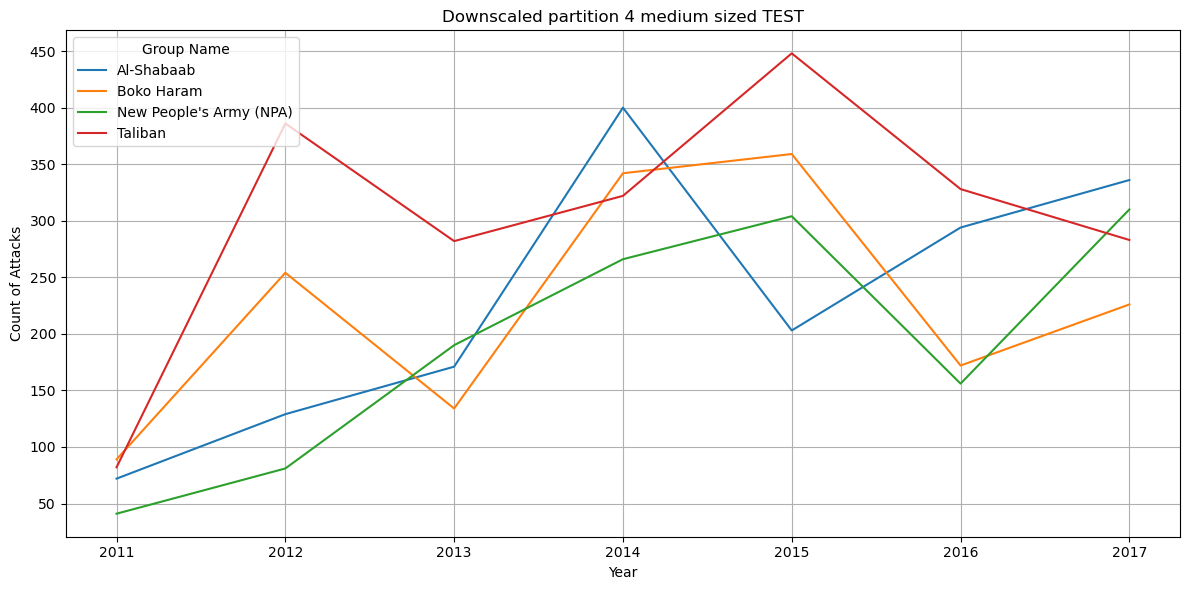

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = dfdownscaled.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Downscaled partition 4 medium sized TEST')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [11]:
total_downscaled = counts(dfdownscaled, top5)
print('Total after downscale: ', total_downscaled)

Taliban: 2131
Al-Shabaab: 1605
Boko Haram: 1576
New People's Army (NPA): 1348
Total after downscale:  6660


In [12]:
dfdownscaled['attack_date'] = pd.to_datetime(dfdownscaled['attack_date'])
dfdownscaled = dfdownscaled.sort_values(by='attack_date')

train_size = int(0.7 * len(dfdownscaled))
train_date = dfdownscaled.iloc[train_size]['attack_date']
print(train_date)

train_df = dfdownscaled[dfdownscaled['attack_date'] <= '2016-02-05']
test_df = dfdownscaled[dfdownscaled['attack_date'] > '2016-02-05']

print("Train %:", len(train_df) / len(dfdownscaled))
print("Test %:", len(test_df) / len(dfdownscaled))


2016-02-05 00:00:00
Train %: 0.7003003003003003
Test %: 0.2996996996996997


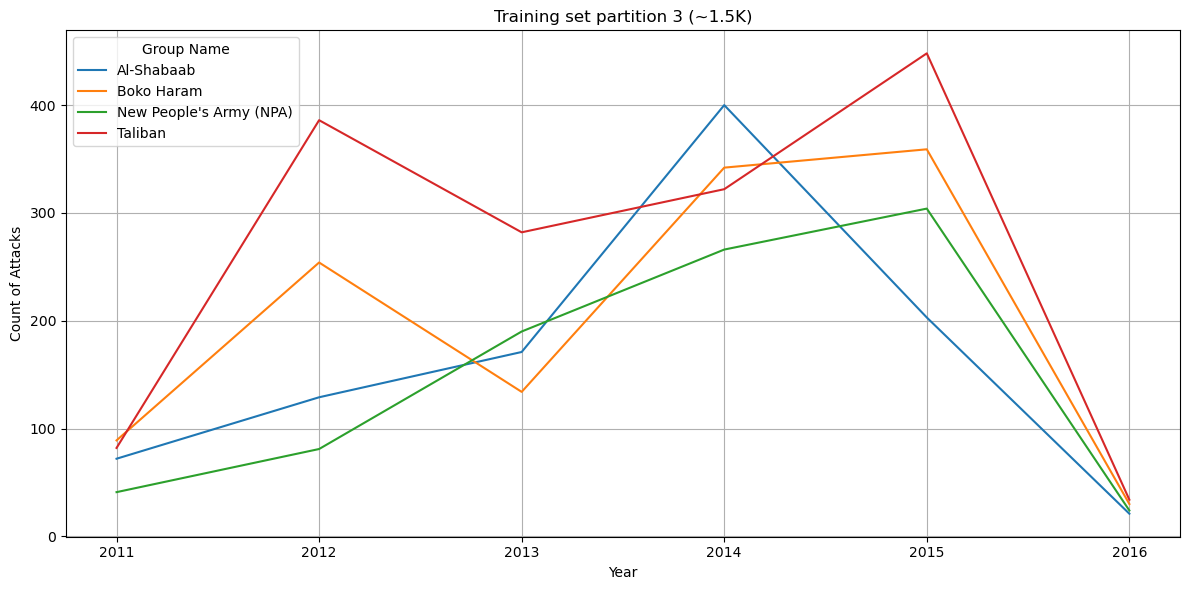

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = train_df.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Training set partition 3 (~1.5K)')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [32]:
total_train = counts(train_df, top5)
print(total_train)

Taliban: 1554
Al-Shabaab: 996
Boko Haram: 1208
New People's Army (NPA): 906
4664


In [34]:
total_test = counts(test_df, top5)
print(total_test)

Taliban: 577
Al-Shabaab: 609
Boko Haram: 368
New People's Army (NPA): 442
1996


In [14]:
print(train_df['iyear'].head())
print(train_df['iyear'][train_df['iyear'] == 2016].value_counts())


4973    2011
4505    2011
0       2011
6604    2011
3466    2011
Name: iyear, dtype: int64
iyear
2016    109
Name: count, dtype: int64


In [15]:
# Combine training and downscaled test data
downscaled_df = pd.concat([train_df, downscaled_test_df_ISIL], ignore_index=True)

# Ensure 'year' column is numeric (in case it's stored as string)
downscaled_df['iyear'] = pd.to_numeric(downscaled_df['iyear'], errors='coerce')

# Sort by 'year'
downscaled_df = downscaled_df.sort_values(by='iyear').reset_index(drop=True)



NameError: name 'downscaled_test_df_ISIL' is not defined

In [ ]:
print(len(downscaled_test_df_ISIL) / len(downscaled_df))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
#new = pd.concat([train_df, downscaled_test_df_ISIL], ignore_index=True)

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = downscaled_df.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Terrorist Attacks Over the Years 1970-1980 by Top 5 Most Active Groups')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
print('Taliban: ', len(downscaled_df[downscaled_df['gname'] == 'Taliban']))
print('Islamic State of Iraq and the Levant (ISIL): ', len(downscaled_df[downscaled_df['gname'] == 'Islamic State of Iraq and the Levant (ISIL)']))
print('Al-Shabaab: ', len(downscaled_df[downscaled_df['gname'] == 'Al-Shabaab']))
print('Boko Haram: ', len(downscaled_df[downscaled_df['gname'] == 'Boko Haram']))
print('NPA: ', len(downscaled_df[downscaled_df['gname'] == 'New People\'s Army (NPA)']))
print('Total: ', 11216)